In [441]:
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [442]:
#Question 1: Slope of Car's Speed 40-50 mph
time=[]
speed=[]
filename='4-prius_speedometer.csv'
datafile=open(filename,"r")
for line in datafile:
    if(line[0]=="#" or line[0]=="ï"):    
        print("ignoring:",line)
    else :
        line1 = re.split(",",line)
        #print(line1)
        time.append(float(line1[0]))
        speed.append(float(line1[1]))

print(time[:5],speed[:5])
import numpy as np
time=np.array(time)
speed=np.array(speed)
print(time[:5],speed[:5])
datafile.close()

ignoring: ï»¿# Documentation for this sheet is online at:,,,,,,,

ignoring: # https://www.youtube.com/watch?v=lCgOq5-WgrA,,,,,,,

ignoring: # time,v,,,,,,

ignoring: # (s),(mph),,,,,,

[2.374, 2.607, 2.64, 2.874, 2.907] [2.0, 2.0, 4.0, 4.0, 6.0]
[2.374 2.607 2.64  2.874 2.907] [2. 2. 4. 4. 6.]


In [443]:
print(speed)
print(time)

[ 2.  2.  4.  4.  6.  6.  8.  8. 11. 11. 22. 22. 16. 16. 18. 18. 20. 20.
 22. 22. 24. 24. 25. 25. 27. 27. 29. 29. 30. 30. 32. 32. 33. 33. 35. 35.
 36. 36. 37. 37. 38. 38. 39. 39. 40. 40. 42. 42. 43. 43. 44. 44. 45. 45.
 46. 46. 47. 47. 48. 48. 48. 49. 49. 50. 50. 51. 51. 52. 52. 53. 53. 55.
 55. 56. 56. 58. 58. 59. 61. 59.]
[ 2.374  2.607  2.64   2.874  2.907  3.174  3.207  3.44   3.507  3.707
  3.74   4.006  4.04   4.573  4.607  4.84   4.873  5.107  5.173  5.407
  5.44   5.673  5.707  5.973  6.007  6.24   6.273  6.507  6.54   6.806
  6.84   7.073  7.106  7.373  7.406  7.64   7.673  7.94   7.973  8.206
  8.24   8.473  8.506  8.773  8.806  9.04   9.073  9.339  9.373  9.606
  9.639  9.873  9.906 10.173 10.206 10.439 10.473 10.706 10.739 11.273
 11.306 11.339 11.573 11.606 11.839 11.872 12.106 12.139 12.406 12.439
 12.972 13.006 13.506 13.572 14.072 14.106 14.639 14.672 15.239 15.205]


In [444]:
i = (speed >= 40) & (speed <= 50)
speed = speed[i]
time = time[i]
print(len(speed))
print(len(time))

21
21


In [445]:
def fit_func(t,m,b):
    return m*t+b

In [446]:
#Fiting the Data Using Scipy.optimize
popt_lin, pcov = curve_fit(fit_func, time, speed)
m,b = popt_lin

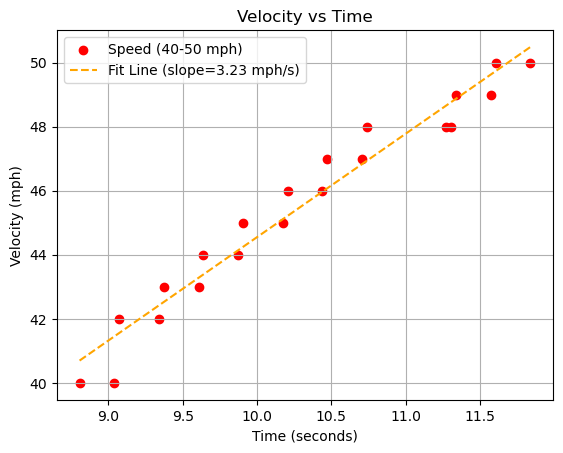

In [447]:
plt.scatter(time, speed, label="Speed (40-50 mph)", color="red")
plt.plot(time, fit_func(time, m, b), color="orange", linestyle="--", label=f"Fit Line (slope={m:.2f} mph/s)")
plt.title("Velocity vs Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity (mph)")
plt.legend()
plt.grid()
plt.show()

In [448]:
#Question 2:
time=[]
xball = []
yball = []
xclock = []
yclock = []
filename='Eugenia-data.csv'
datafile=open(filename,"r")
for line in datafile:
    if(line[0]=="#" or line[0]=="ï"):    
        print("ignoring:",line)
    else :
        line1 = re.split(",",line)
        time.append(float(line1[0]))
        xball.append(float(line1[1]))
        yball.append(float(line1[2]))
        xclock.append(float(line1[3]))
        yclock.append(float(line1[4]))
time=np.array(time)
xball=np.array(xball)
yball=np.array(yball)
xclock=np.array(xclock)
yclock=np.array(yclock)

ignoring: ï»¿# Data from LoggerPro analysis of Eugenia ball toss video,,,,

ignoring: # time,xball,yball,x-clock,y-clock

ignoring: # (s),(m),(m),(m),(m)



In [449]:
rxball = xball - xclock
ryball = yball - yclock

In [450]:
print(rxball)

[2.26231713 2.06742157 1.92220526 1.84195415 1.75788155 1.67763044
 1.57827192 1.51712821 1.44834154 1.3528045  1.30312524 1.23816005
 1.16173042 1.0623719  1.0203356  0.95537041 0.87894078 0.84072596
 0.7490104  0.7069741  0.70315262 0.61908003 0.54265039 0.40125557]


In [451]:
print(xball)

[2.6602098  2.56467276 2.50735053 2.52263646 2.54938683 2.55320831
 2.5570298  2.54174387 2.53027942 2.5149935  2.5149935  2.53027942
 2.54938683 2.5341009  2.5341009  2.53792239 2.5149935  2.52263646
 2.50352905 2.5341009  2.60670906 2.56467276 2.52645794 2.43856386]


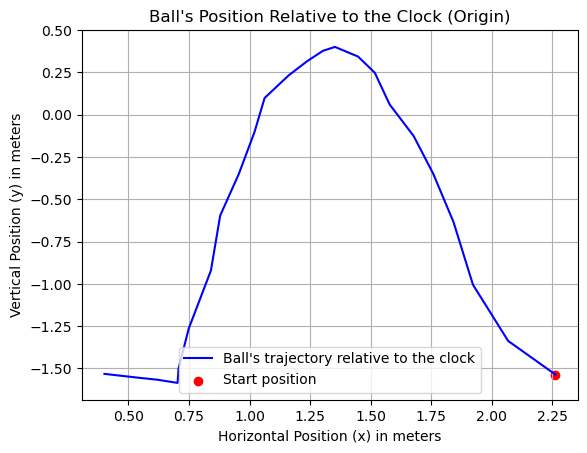

In [452]:
plt.plot(rxball, ryball, label="Ball's trajectory relative to the clock", color="blue")
plt.scatter(rxball[0], ryball[0], color="red", label="Start position")
plt.title("Ball's Position Relative to the Clock (Origin)")
plt.xlabel("Horizontal Position (x) in meters")
plt.ylabel("Vertical Position (y) in meters")
plt.legend()
plt.grid(True)
plt.show()

In [453]:
g = -9.8 #m/s^2
intval = [ryball[0],0]
def fit_func(t,a,b):
    return a + b*t + (g/2)*t**2

In [454]:
print(max(time))

3.337


In [455]:
popt_curve, pcov = curve_fit(fit_func, time, ryball, p0=intval)
a,b = popt_curve

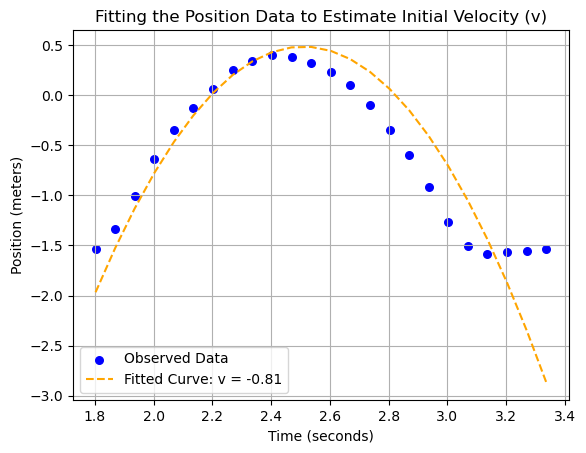

In [456]:
plt.scatter(time, ryball, label="Observed Data", color="blue", s=30)
plt.plot(time, fit_func(time, *popt_curve), label=f"Fitted Curve: v = {v_fit:.2f}", color="orange", linestyle="--")
plt.title("Fitting the Position Data to Estimate Initial Velocity (v)")
plt.xlabel("Time (seconds)")
plt.ylabel("Position (meters)")
plt.legend()
plt.grid(True)
plt.show()

In [457]:
# Error
tavg = np.average(time)
yavg = np.average(ryball)
t2avg = np.average(time**2)
t3avg = np.average(time**3)
tyavg = np.average(time*ryball)

In [458]:
index = np.where(ryball == min(ryball))[0][0]
print(index)

20


In [459]:
b = (tyavg -yavg *tavg) / (t2avg - tavg**2)
a = yavg - b*tavg - (g/2) * t2avg

def fit_func1(t,a,b):
    return a + b*t + (g/2)*t**2

popt_curve1, pcov1 = curve_fit(fit_func, time[:20], ryball[:20], p0=intval)
a,b = popt_curve1

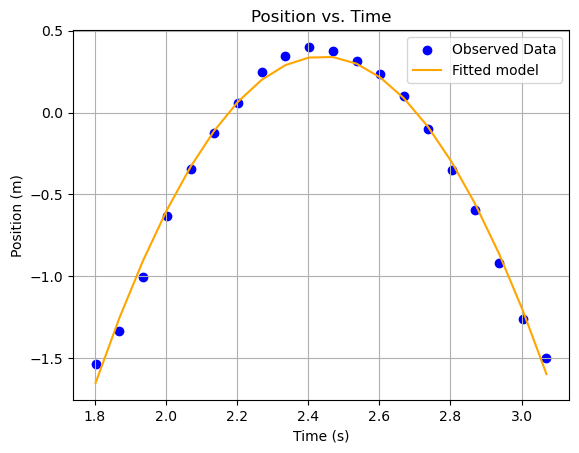

In [460]:
plt.scatter(time[:20], ryball[:20], label='Observed Data', color='blue')
y_fitted = fit_func1(time[:20], *popt_curve1)
plt.plot(time[:20], y_fitted, label='Fitted model', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time')
plt.grid(True)
plt.legend()
plt.show()

In [461]:
#At Release
print('The Velocity of the ball at release is:',(b+g*2),'m/s')

The Velocity of the ball at release is: 4.315413538594335 m/s


In [462]:
#Question 3
t = []
temp = []
filename='upstairs_shower.txt'
datafile=open(filename,"r")
for line in datafile:
    if(line[0]=="#" or line[0]=="ï"):    
        print("ignoring:",line)
    else :
        line1 = re.split(r'\s+',line)
        t.append(float(line1[0]))
        temp.append(float(line1[1]))
        
t = np.array(t)
temp = np.array(temp)

ignoring: # Upstairs shower at 1202 Wabasha

ignoring: # pipes initially cold (no showers for 12 hours)

ignoring: # water heater thermostat set for 130F

ignoring: # Logger Pro Column Data:

ignoring: # Time    Temperature

ignoring: # min Â°C



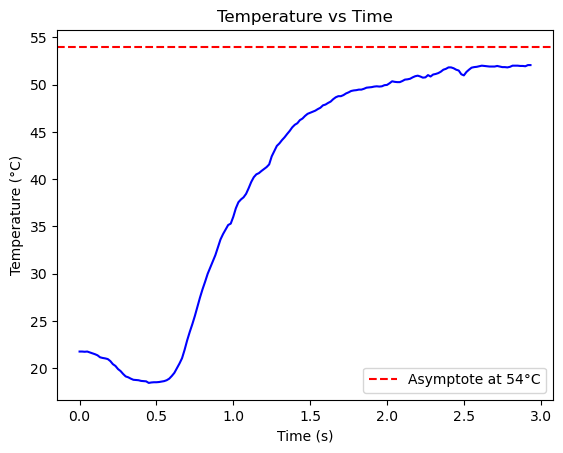

In [463]:
plt.plot(t, temp, linestyle='-', color='blue')
plt.axhline(y=54, color='red', linestyle='--', label='Asymptote at 54°C')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs Time')
plt.legend()
plt.show()

In [464]:
#Finding value at begining
print(min(temp))
index = np.where(temp == min(temp))[0][0]
print(index)
print(t[27])

18.4299157309
27
0.45


In [465]:
def fit_func(t,dTo,toa):
    To = 54
    return To + dTo*np.exp(-(t)/toa)

vals = [temp[27]-54,1]

para,cov = curve_fit(fit_func,t[27:],temp[27:],p0=vals)
dTo,toa = para

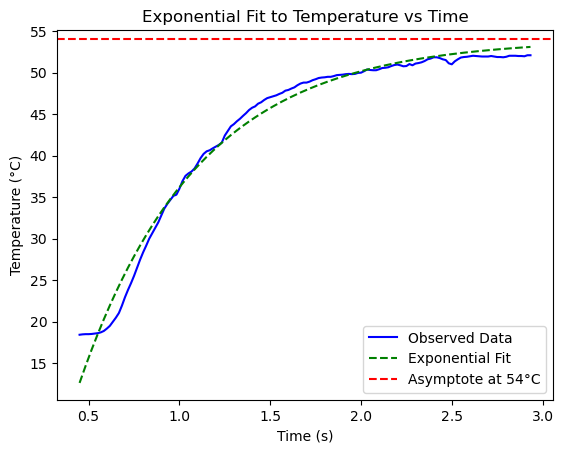

In [466]:
plt.plot(t[27:], temp[27:],linestyle='-', color='b', label='Observed Data')
y_fitted = fit_func(t[27:], *para)
plt.plot(t[27:], y_fitted, color='g', linestyle='--', label='Exponential Fit')
plt.axhline(y=54, color='r', linestyle='--', label='Asymptote at 54°C')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Exponential Fit to Temperature vs Time')
plt.legend()
plt.show()

In [467]:
#Question 4:
l = []
t = []
filename='swingsets.csv'
datafile=open(filename,"r")
for line in datafile:
    if(line[0]=="#" or line[0]=="ï"):    
        print("ignoring:",line)
    else :
        line1 = re.split(',',line)
        l.append(float(line1[0]))
        t.append(float(line1[1]))
l = np.array(l)
t = np.array(t)

ignoring: # Fall 2022, Physics 180 class data

ignoring: # average from 5 swings,

ignoring: #length-cm	time-sec",

ignoring: # small initial angle,



In [468]:
def fit_func(l,a):
    return a * np.sqrt(l)

para,cov = curve_fit(fit_func,l,t,p0=l[0])
a = para

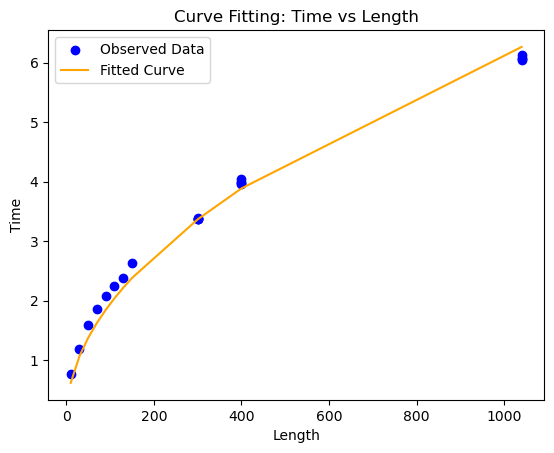

In [469]:
plt.scatter(l, t, color='b', label='Observed Data')
plt.plot(l, fit_func(l,a), color='orange', label='Fitted Curve')
plt.xlabel('Length')
plt.ylabel('Time')
plt.title('Curve Fitting: Time vs Length')
plt.legend()

# Show the plot
plt.show()

In [470]:
#Question 5
import sympy as sp
t = sp.symbols('t')

In [471]:
f = sp.sin(2*sp.pi*t)**2
avg_value = sp.integrate(f,(t,0,1))
avg_sqrt = sp.sqrt(avg_value)
#v = sp.symbols('v')
r = 5* avg_sqrt

In [472]:
print('The Integral Gives:',r) #sqrt(2)/2 = 1/sqrt(2)

The Integral Gives: 5*sqrt(2)/2


In [473]:
T,a = sp.symbols('T a')

In [474]:
func1 = sp.sin(2 * sp.pi* t/T)**2
h = sp.Heaviside(t)
avg_value = sp.integrate(func * h, (t, 0, a*T))
avg_sqrt = sp.sqrt(avg_value)
r1 = 1 * avg_sqrt

In [475]:
print('The Integral Gives:',r1)

The Integral Gives: sqrt((T*a/2 - sin(4*pi*T*a)/(8*pi))*Heaviside(T*a))
